# Data Preprocessing
KaiyangL

# Table of Content

**- General Steps**
1. Data Cleaning
2. Data Integration
3. Data Transformation
4. Data Reduction

**- Example 1 - Airbnb House Price (Basic)**
1. Handling Missing Data: Deletion, Filling (fixed numbers, statistics, interpolation)
2. Handling Features with Special Characters
3. Encoding (Ordinal Encoding, One-Hot Encoding)
4. Summary Statistics
5. Transformation (leave only positive, log-transformation)
6. Scaling (Min-Max Scaling, Standardisation)

**- Example 2 - Loan Default (Advanced)(Continuing...)**
1. Handling Missing Data\
a. Visualizing (Matrix, Correlation Map, Dendrogram, Simple Numeric Summaries)\
b. Methods (Deletion, Encoding, Imputation)
2. Encoding Categorical Attributes\
a. Supervised: Liklihood Encoding, Target Encoding, Deep Learning\
b. Approaches for Novel Categories\
\
...

## General Steps

 <img src="Data_Preprocessing.png" width = "800" height = "250" align= left />

In specific, 
**Data transformation** is a process of converting the data from one format or representation to another.\

Types of data transformations
    
1. **Normalization or scaling**: This involves transforming the data so that it has a mean of zero and a standard deviation of one, or so that it is within a specified range (e.g. between 0 and 1). This is often done to ensure that different features are weighted equally in a model.

2. **Encoding**: This involves converting categorical or ordinal data, which cannot be interpreted by a model, into numerical data that can be used by the model. There are several ways to encode data, including one-hot encoding and label encoding.

3. **Aggregation**: This involves combining multiple values or observations into a single value, such as taking the average or sum of a group of numbers. This is often done to reduce the dimensionality of the data or to summarize the data in a meaningful way.

4. **Smoothing**: This involves removing noise or random fluctuations from the data, in order to make it more stable and easier to interpret. This is often done using techniques such as smoothing splines or moving averages.

# Example 1 : Airbnb House Price (Basic)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


original_train = pd.read_csv('ab_train.csv',encoding ='ISO-8859-1',index_col = 0)
original_test = pd.read_csv('ab_test.csv',encoding ='ISO-8859-1',index_col = 0)
original_train

,name,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,property_type,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
9835,HOAMA - Ambient and Cosy - Conveniently located,100%,f,10,10,f,-33.82413,151.07806,t,Apartment,...,f,strict_14_with_grace_period,f,f,10,10,0,0,1.48,$130.00
8191,Stairway to Heaven,NaN,f,1,1,f,-33.76006,151.26285,t,Townhouse,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.30,$225.00
1254,"Cosy cottage, sunny terrace - near CBD, beaches",100%,t,2,2,f,-33.82620,151.22639,t,Cottage,...,f,strict_14_with_grace_period,f,f,2,1,1,0,1.40,$59.00
1195,Stylish and comfy one bedroom in heart of Sydney,100%,f,1,1,f,-33.87789,151.21450,t,Apartment,...,f,moderate,f,f,1,1,0,0,0.63,$99.00
4038,Clean tidy and fresh apartment (English&??????),NaN,f,1,1,f,-33.82706,151.08670,t,Apartment,...,f,flexible,f,f,1,0,1,0,0.06,$75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,STUNNING PENTHOUSE WITH FREE PARKING IN SYDNEY...,100%,t,2,2,t,-33.88310,151.20447,f,Apartment,...,f,strict_14_with_grace_period,f,f,2,2,0,0,7.22,$500.00
5191,Bondi beach at your doorstep.,NaN,f,1,1,f,-33.89228,151.28347,f,Apartment,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.05,$138.00
5390,Luxury Home with Idyllic views,NaN,f,1,1,t,-33.81950,151.22292,t,House,...,f,moderate,f,f,1,1,0,0,0.02,$700.00
860,Family friendly character home 6km to the CBD,NaN,f,1,1,f,-33.87770,151.15473,t,House,...,f,flexible,f,f,1,1,0,0,NaN,$180.00


In [2]:
#查看一下train和test set的行列数
print('training set size: {0}'.format(original_train.shape))
print(original_test.shape)

training set size: (7868, 56)
(1968, 55)


### Handle Missing Data

In [3]:
pd.set_option('max_columns',100)
pd.set_option('max_row',300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

original_train.isnull().sum()

name                                               0
host_response_rate                              3666
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          4
bedrooms                                           1
beds                                              11
bed_type                                           0
square_feet                                     7820
weekly_discount                                 7145
monthly_discount                              

In [4]:
original_test.isnull().sum()

name                                               0
host_response_rate                               900
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          1
bedrooms                                           2
beds                                               2
bed_type                                           0
square_feet                                     1957
weekly_discount                                 1793
monthly_discount                              

In [5]:
# Deletion

In [6]:
filled_train = original_train.copy()
filled_test = original_test.copy()

In [7]:
# Do the same for both train set and test set
filled_train = filled_train.drop(['name','beds','square_feet'],axis = 1)
filled_test = filled_test.drop(['name','beds','square_feet'],axis = 1)

In [8]:
# Filling

In [9]:

'''----------------------------------------Filling some fixed numbers------------------------------------------'''

filled_train['weekly_discount'] = filled_train['weekly_discount'].fillna(0)
filled_train['monthly_discount'] = filled_train['monthly_discount'].fillna(0)
filled_train['reviews_per_month'] = filled_train['reviews_per_month'].fillna(0)
filled_train['host_response_rate'] = filled_train['host_response_rate'].fillna('0%')


'''----------------------------------------Filling some statistics: mean()/median()/mode()-------------------'''
filled_train['security_deposit_perc'] = filled_train['security_deposit_perc'].fillna(filled_train['security_deposit_perc'].mean())
filled_train['cleaning_fee_perc'] = filled_train['cleaning_fee_perc'].apply(lambda x: filled_train['cleaning_fee_perc'].median()if pd.isnull(x) else x)


'''----------------------------------------Filling with Interpolation-----------------------------------------------------'''

inter_filled_col = ['review_scores_rating','review_scores_accuracy',
                    'review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value']
filled_train[inter_filled_col] = filled_train[inter_filled_col].interpolate()


'''---------------------------------------Dropping col with small amount of NA----------------------------------------------'''
filled_train = filled_train.dropna()
print(filled_train.shape)

(7862, 53)


In [10]:

'''----------------------------------------Filling some fixed numbers------------------------------------------'''

filled_test['weekly_discount'] = filled_test['weekly_discount'].fillna(0)
filled_test['monthly_discount'] = filled_test['monthly_discount'].fillna(0)
filled_test['reviews_per_month'] = filled_test['reviews_per_month'].fillna(0)
filled_test['host_response_rate'] = filled_test['host_response_rate'].fillna('0%')


'''----------------------------------------Filling some statistics: mean()/median()/mode()-------------------'''
filled_test['security_deposit_perc'] = filled_test['security_deposit_perc'].fillna(filled_test['security_deposit_perc'].mean())
filled_test['cleaning_fee_perc'] = filled_test['cleaning_fee_perc'].apply(lambda x: filled_test['cleaning_fee_perc'].median()if pd.isnull(x) else x)


'''----------------------------------------Filling with Interpolation-----------------------------------------------------'''

inter_filled_col = ['review_scores_rating','review_scores_accuracy',
                    'review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value']
filled_test[inter_filled_col] = filled_test[inter_filled_col].interpolate()


'''---------------------------------------Filling col with small amount of NA by using their mean----------------------------------------------'''
filled_test['bathrooms'] = filled_test['bathrooms'].fillna(filled_test['bathrooms'].mean())
filled_test['bedrooms'] = filled_test['bedrooms'].fillna(filled_test['bedrooms'].mean())

### Handling features with special characters

In [11]:
FE_train = filled_train.copy()
FE_test = filled_test.copy()

In [12]:
# Dealing with "price" (Y)
FE_train['price'] = FE_train['price'].apply(lambda x : float(x.split('$')[1].replace(',','')))

# Dealing with "host_response_rate"
FE_train['host_response_rate'] = FE_train['host_response_rate'].apply(lambda x: float(x.replace('%','')))

# Same operation for test set
FE_test['host_response_rate'] = FE_test['host_response_rate'].apply(lambda x: float(x.replace('%','')))

### Ordinal Encoding (Ordered Categories)

In [13]:
print(FE_train['cancellation_policy'].value_counts())

strict_14_with_grace_period    3429
flexible                       2627
moderate                       1771
super_strict_60                  23
super_strict_30                  12
Name: cancellation_policy, dtype: int64


Flexible: Full refund within limited period(one day prior)

Moderate: Full refund within limited period(five day prior)

Strict: Full refund if cancellation is within 48 hours of booking

Super Strict 30 Days: 50% refund up until 30 days prior to check in, minus service fees

Super Strict 60 Days: 50% refund up until 60 days prior to check in, minus service fees

In [14]:
FE_train['cancellation_policy'] = FE_train['cancellation_policy'].replace({
    'flexible':5,'moderate':4,'strict_14_with_grace_period':3,'super_strict_30':2,'super_strict_60':1})

FE_test['cancellation_policy'] = FE_test['cancellation_policy'].replace({
    'flexible':5,'moderate':4,'strict_14_with_grace_period':3,'super_strict_30':2,'super_strict_60':1})

### one-hot encoding

In [15]:
# vectorization

In [16]:
FE_dm_train = pd.get_dummies(FE_train, drop_first=True).copy()
FE_dm_test = pd.get_dummies(FE_test, drop_first=True).copy()
print(FE_dm_train.shape)
print(FE_dm_test.shape)

(7862, 80)
(1968, 72)


In [17]:
train_del = []
for i in FE_dm_train.columns:
    if i not in FE_dm_test.columns:
        train_del.append(i)
train_del

['price',
 'property_type_Barn',
 'property_type_Camper/RV',
 'property_type_Cave',
 'property_type_Dome house',
 'property_type_Island',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa']

In [18]:
test_del = []
for i in FE_dm_test.columns:
    if i not in FE_dm_train.columns:
        test_del.append(i)
test_del

['property_type_Yurt']

In [19]:
train_del[1:]

['property_type_Barn',
 'property_type_Camper/RV',
 'property_type_Cave',
 'property_type_Dome house',
 'property_type_Island',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa']

In [20]:
FE_dm_train = FE_dm_train.drop(train_del[1:],axis = 1)
FE_dm_test = FE_dm_test.drop(test_del,axis = 1)
print(FE_dm_train.shape)
print(FE_dm_test.shape)

(7862, 72)
(1968, 71)


## Summary Statistics

In [21]:
# Check which is continues and categoricals

In [22]:
continuous = []
dummy = []
for i in FE_dm_train.columns:
    if FE_dm_train[i].value_counts().shape[0] > 2:
        continuous.append(i)
    else:
        dummy.append(i)
        
print('continuous_variable:{0}'.format(continuous))
print('---------------------------------------------------')
print('dummy_variable:{0}'.format(dummy))

continuous_variable:['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'weekly_discount', 'monthly_discount', 'security_deposit_perc', 'cleaning_fee_perc', 'guests_included', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_mon

In [23]:
descriptive = FE_dm_train.describe()
descriptive.loc['skew', :] = FE_dm_train.skew()
descriptive.loc['kurt', :] = FE_dm_train.kurt()
descriptive[continuous].round(3)

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
count,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000,7862.00000
mean,50.43500,9.10700,9.10700,-33.86300,151.20800,3.59800,1.37000,1.64600,1.07200,1.33500,230.90500,49.37900,1.64300,8.40100,5.30200,671.92900,4.93900,5.74100,667.23100,672.14300,5.35500,669.72200,9.11000,20.24600,32.24000,97.96800,14.94200,6.40200,93.63300,9.57700,9.28900,9.73800,9.74500,9.72900,9.34100,3.88600,7.43400,6.69700,0.68900,0.04800,0.80200,213.74700
std,48.79900,30.30700,30.30700,0.07200,0.08000,2.23800,0.69600,1.11100,9.74400,8.05400,323.69600,30.43300,1.43300,17.89800,20.62000,531.62000,20.22200,20.76600,532.04300,541.66400,20.56500,541.69200,11.50700,23.74900,36.26400,121.93500,33.71900,13.39900,8.89600,0.89100,1.10200,0.71300,0.72400,0.62600,0.94100,0.88900,24.26200,24.33600,1.73200,0.81600,1.37400,249.59800
min,0.00000,0.00000,0.00000,-34.08800,150.60100,1.00000,0.00000,0.00000,-202.97600,-134.74200,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,52.00000
25%,0.00000,1.00000,1.00000,-33.89700,151.18400,2.00000,1.00000,1.00000,0.00000,0.00000,119.00000,33.00000,1.00000,0.00000,1.00000,30.00000,1.00000,2.00000,30.00000,30.00000,1.60000,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,91.00000,9.33300,9.00000,10.00000,10.00000,10.00000,9.00000,3.00000,1.00000,0.00000,0.00000,0.00000,0.00000,89.00000
50%,75.00000,1.00000,1.00000,-33.88100,151.21700,3.00000,1.00000,1.00000,0.00000,0.00000,230.90500,44.00000,1.00000,0.00000,2.00000,1125.00000,2.00000,3.00000,1125.00000,1125.00000,2.20000,1125.00000,0.00000,5.00000,11.00000,39.00000,2.00000,1.00000,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,9.66700,4.00000,1.00000,1.00000,0.00000,0.00000,0.16000,146.00000
75%,100.00000,3.00000,3.00000,-33.83300,151.26200,4.00000,1.87500,2.00000,0.00000,0.00000,230.90500,58.00000,2.00000,12.00000,5.00000,1125.00000,5.00000,5.00000,1125.00000,1125.00000,5.00000,1125.00000,20.00000,44.00000,70.00000,173.75000,12.00000,5.00000,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,5.00000,2.00000,1.00000,1.00000,0.00000,1.00000,233.00000
max,100.00000,279.00000,279.00000,-33.39000,151.34000,16.00000,11.00000,19.00000,93.57100,93.87900,8475.00000,308.00000,16.00000,385.00000,1000.00000,3000.00000,1000.00000,1000.00000,3000.00000,9999.00000,1000.00000,9978.30000,30.00000,60.00000,90.00000,365.00000,413.00000,127.00000,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,5.00000,197.00000,197.00000,21.00000,26.00000,13.49000,4656.00000
skew,-0.04100,5.86200,5.86200,1.11900,-2.21900,1.59500,2.819

In [24]:
FE_dm_train.corr()['price'].sort_values()

room_type_Private room                         -0.30932
property_type_Apartment                        -0.24512
cancellation_policy                            -0.18418
cleaning_fee_perc                              -0.15698
extra_people_perc                              -0.14308
calculated_host_listings_count_private_rooms   -0.13281
reviews_per_month                              -0.09248
instant_bookable_t                             -0.09223
security_deposit_perc                          -0.07583
number_of_reviews                              -0.07452
number_of_reviews_ltm                          -0.07415
property_type_Guest suite                      -0.04209
property_type_Guesthouse                       -0.04167
room_type_Shared room                          -0.03112
host_is_superhost_t                            -0.03078
calculated_host_listings_count_shared_rooms    -0.02984
property_type_Townhouse                        -0.02847
property_type_Hostel                           -

In [25]:
# split the data x and target y

In [26]:
X_train_ori = FE_dm_train.drop(['price'],axis = 1)
y_train_ori = FE_dm_train['price']
X_test_ori = FE_dm_test

### Transformation

In [27]:
#latitude 都是负的，需要变为正数
X_train_ori['latitude'] = -X_train_ori['latitude']
X_test_ori['latitude'] = -X_test_ori['latitude']

X_train_ori['weekly_discount'] = X_train_ori['weekly_discount'].apply(lambda x: 0 if x < 0 else x)
X_test_ori['weekly_discount'] = X_test_ori['weekly_discount'].apply(lambda x: 0 if x < 0 else x)

X_train_ori['monthly_discount'] = X_train_ori['monthly_discount'].apply(lambda x: 0 if x < 0 else x)
X_test_ori['monthly_discount'] = X_test_ori['monthly_discount'].apply(lambda x: 0 if x < 0 else x)

In [28]:
# Log-transformation

In [29]:
continuous.remove('price')

# Better only to do log-transformation for the variable whose shew >0

X_train_ori[continuous] = np.log1p(X_train_ori[continuous])
X_train_log = X_train_ori.copy()

X_test_ori[continuous] = np.log1p(X_test_ori[continuous])
X_test_log = X_test_ori.copy()

y_train_log = np.log(y_train_ori)

### Scaling

In [30]:
# Two method to do data scaling, choose one

# Min-max scaling
X_train_log_mm = X_train_log.copy()
for i in continuous:
    X_train_log_mm[i] = (X_train_log_mm[i] - X_train_log_mm[i].min())/(X_train_log_mm[i].max() - X_train_log_mm[i].min())

X_test_log_mm = X_test_log.copy()
for i in continuous:
    X_test_log_mm[i] = (X_test_log_mm[i] - X_test_log_mm[i].min())/(X_test_log_mm[i].max() - X_test_log_mm[i].min())


#Standardisation
X_train_log_std = X_train_log.copy()
for i in continuous:
    X_train_log_std[i] = (X_train_log_std[i] - X_train_log_std[i].mean())/X_train_log_std[i].std()

X_test_log_std = X_test_log.copy()
for i in continuous:
    X_test_log_std[i] = (X_test_log_std[i] - X_test_log_std[i].mean())/X_test_log_std[i].std()

# **Example 2 : Loan Default (Advanced)**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.00000,not_neg,not_int,not_lpsm,118000.00000,sb,pr,home,1U,1740.00000,EXP,758,CIB,25-34,to_inst,98.72881,south,direct,1,45.00000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.00000,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.00000,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56000,0.20000,595.00000,360.00000,neg_amm,not_int,not_lpsm,508000.00000,sb,pr,home,1U,9480.00000,EXP,834,CIB,35-44,to_inst,80.01969,south,direct,0,46.00000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25000,0.68100,NaN,360.00000,not_neg,not_int,not_lpsm,658000.00000,sb,pr,home,1U,11880.00000,EXP,587,CIB,45-54,not_inst,69.37690,North,direct,0,42.00000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00000,0.30420,0.00000,360.00000,not_neg,not_int,not_lpsm,758000.00000,sb,pr,home,1U,10440.00000,CRIF,602,EXP,25-34,not_inst,91.88654,North,direct,0,39.00000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# 1 Handling Missing Values

Missing data are not rare in real data sets. In fact, the chance that at least one data point is missing increases as the data set size increases. Missing data can occur any number of ways, some of which include the following.

- Merging of source data sets
- Random events
- Failures of measurement



## 1.1 Visualizing Missing Data

Visualizations as well as numeric summaries are the first step in understanding the challenge of missing information in a data set. For small to moderate data (100s of samples and 100s of attributes), several techniques are available that allow the visualization of all of the samples and Attributes simultaneously.

In this notebook I'll Cover Following visualizations for missing values:-
- Matrix
- Correlation Heatmap
- Dendrogram
- Simple numerical summaries

Question may arise that why we need Visualizations?
Because it is wise to explore relationships within the attributes that might be related to missingness. 

### 1.1.1 Matrix

It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

In [34]:
import missingno as msno

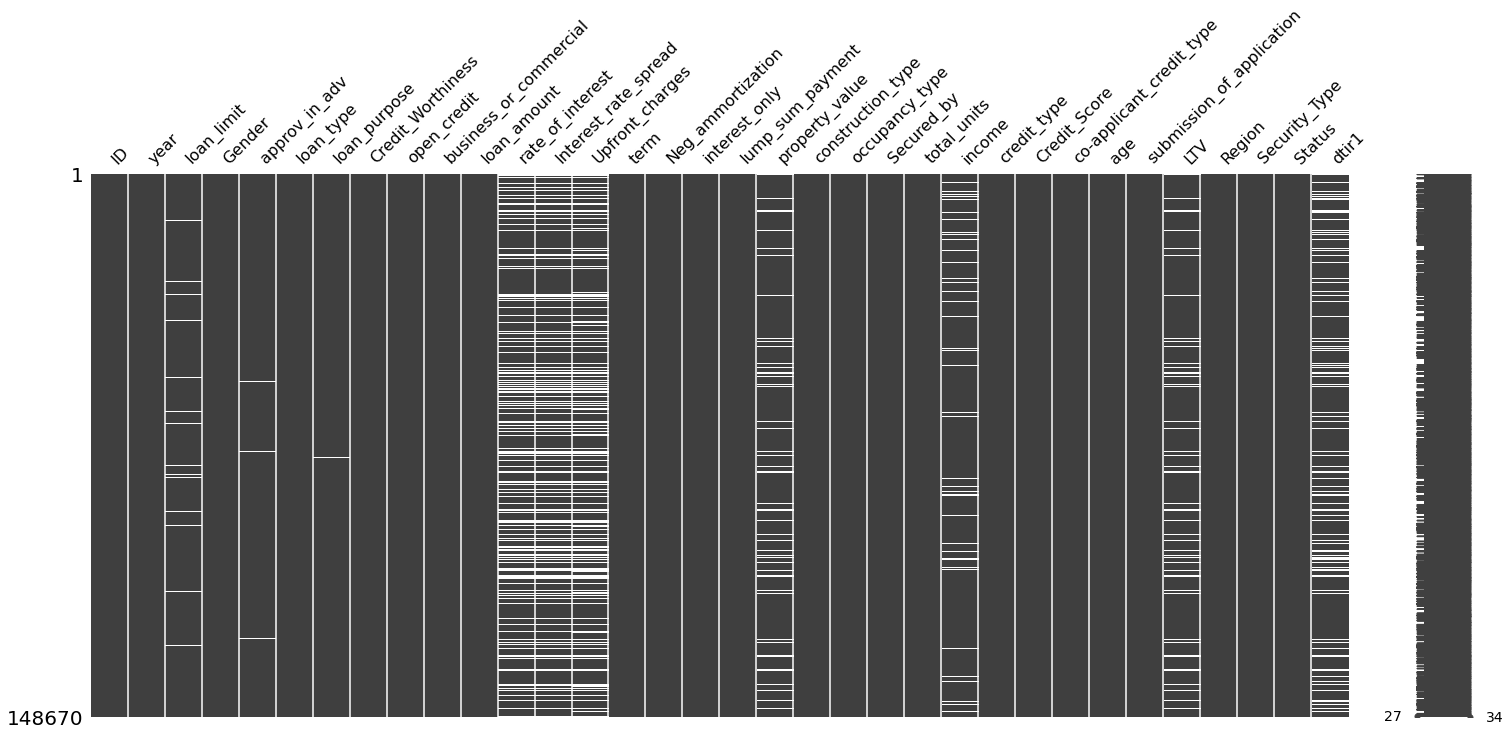

<Figure size 1080x648 with 0 Axes>

In [35]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

From the above plot we can interpret our dataset has lots of missing values in it 

### 1.1.2 Correlation Heatmap

Correlation heatmap measures nullity correlation between columns of the dataset. It shows how strongly the presence or absence of one feature affects the other.

Nullity correlation ranges from(-1 to 1):
- -1 means if one column(attribute) is present, the other is almost certainly absent.
- 0 means there is no dependence between the columns(attributes).
- 1 means if one column(attributes) is present, the other is also certainly present.

Unlike in a familiar correlation heatmap, if you see here, many columns are missing. Those columns which are always full or always empty have no meaningful correlation and are removed from the visualization.

The heatmap is helpful for identifying data completeness correlations between attribute pairs, but it has the limited explanatory ability for broader relationships and no special support for really big datasets.

<AxesSubplot:>

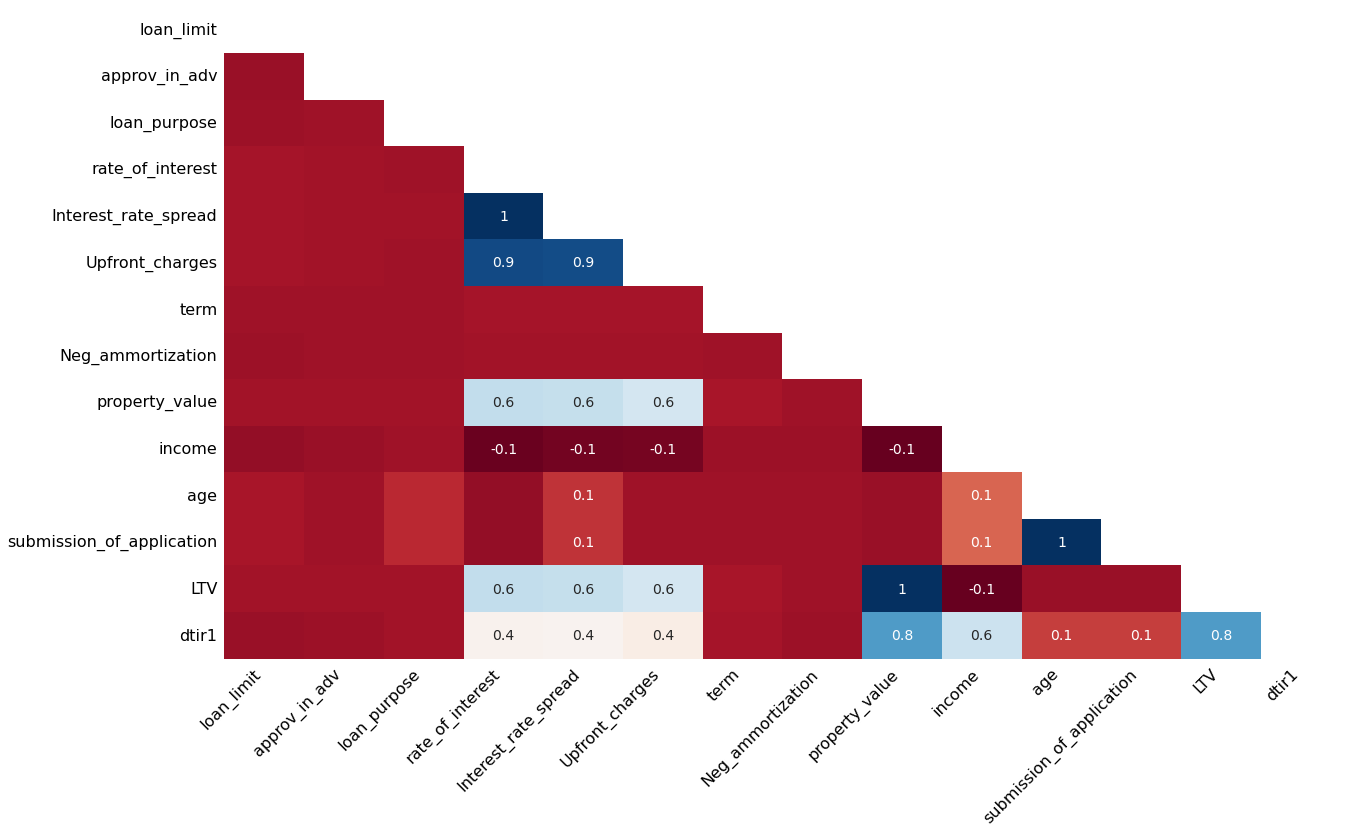

In [36]:
msno.heatmap(df, labels = True)

From above visualization we can easily interpret missingness of attribute rate_of_interest and upfront_charges is dependent on each other(correlation value = 1) means if one will be present another will be present. 

### 1.1.3 Dendrogram

The dendrogram shows the hierarchical nullity relationship between columns. The dendrogram uses a hierarchical clustering algorithm against one another by their nullity correlation.

In [37]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<AxesSubplot:>

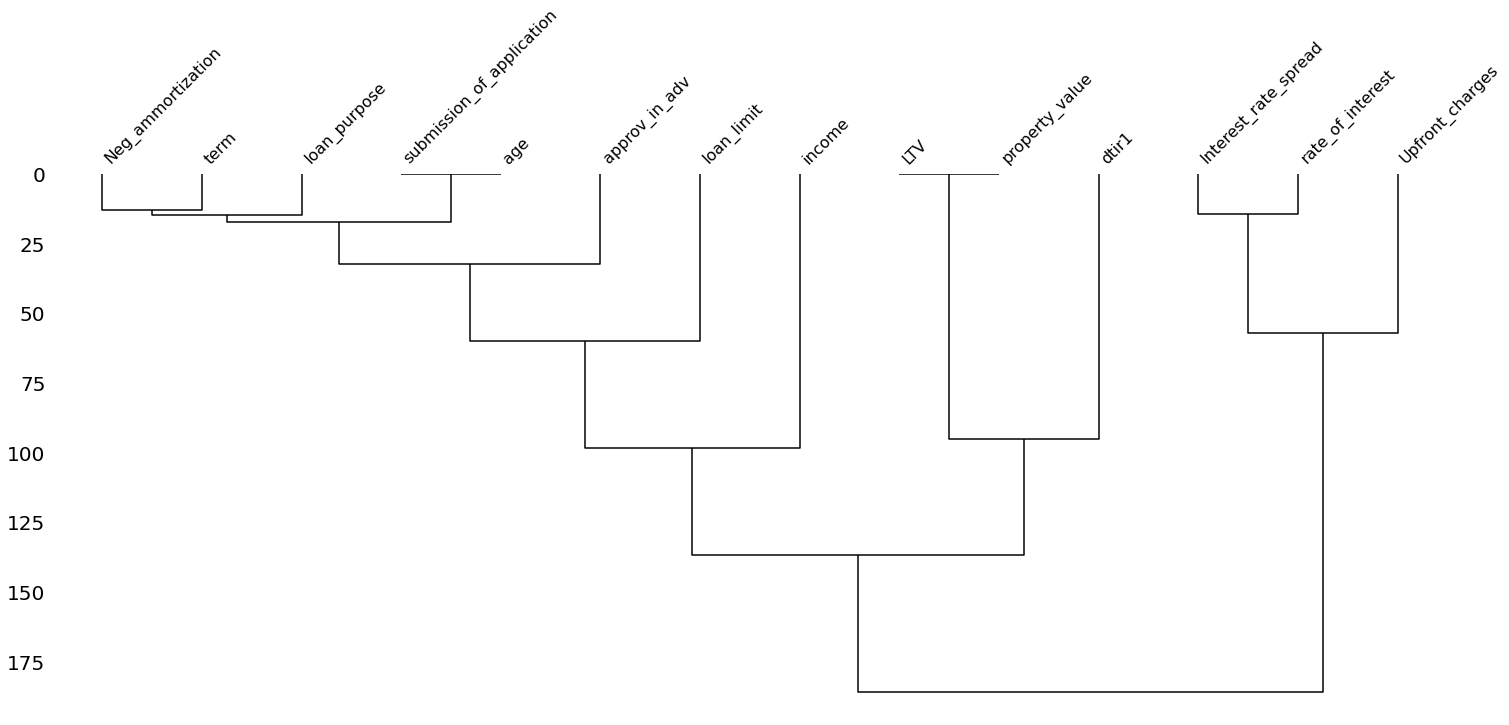

In [38]:
msno.dendrogram(df[missing_columns])

We interpret the dendrogram based on a top-down approach, i.e., to focus on the height at which any two columns are joined together with matters of nullity. More will be the height less will be the relation and vice versa is also True. 

For example if we see pair of attributes LTV and property value has height 0 implies they are highly correlated in case of nullity. Similarly attribute LTV and rate_of_interest have maximum height implies they are less correlated with each other.  

### 1.1.4 Simple Numerical Summaries

Moving Forward lets try to analyse numerical summary of missing attributes. Simple numerical summaries are effective at identifying problematic predictors and samples when the data become too large to visually inspect.

In [39]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [40]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


Now I guess visualization part is done lets move forward to methods which we can use to handle missing values.

## 1.2 Methods to Handle Missing Data

As we Know if our data has missing values than our model will not train except few models which can tolerate them like some tree based models but the point is we want to handle this and how can we handle them. So, in this notebook to handle missing data I will discuss following techniques :-

- Deletion of Data 
- Encoding Missingness
- Imputation Methods


### 1.2.1 Deletion of Data

The simplest approach for dealing with missing values is to remove entire attribute(s) and/or sample(s) that contain missing values. However, one must carefully consider a number of aspects of the data prior to taking this approach. For example, missing values could be eliminated by removing all predictors that contain at least one missing value. Similarly, missing values could be eliminated by removing all samples with any missing values.

**Note: When it is difficult to obtain samples or when the data contain a small number of samples (i.e., rows), then it is not desirable to remove samples from the data.**

Consider this small intuition shown below

Let M = Number of Samples(rows).\
and Let N = Number of Attributes(columns).


Case 1: Deletion of Attributes

If N has range of [1-10]\
Then don't delete the attribute that contain missing values but if that attribute has missing values around 80-90% then deletion of that attribute will be good option instead of just predicting values of those 80-90% data based on that 10-20% data. 

Case 2: Deletion of Samples

If M is a large number according to your task\
Then deletion of sample can be a Good step but if that sample has few missing values with respect to attribute, then you should consider methods to fill those missing values.

Lets move on to the implementation part, I will just show how to delete data for both cases but you can interpret more according to your tasks.

**Deletion of an Attribute**

According to Simple numerical Summaries the attribute Upfront_charges has largest missing values percentage of (26.664%) which is not ideal percentage to remove a feature but just for sake of implementation I will remove that feature.

In [41]:
df_temp = df.copy()

In [42]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25 #25% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)


By generating numerical summary of df_temp we can see now attribute Upfont_chargers being removed from the dataset as it has missing values percentage greater than threshold we defined

In [43]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [44]:
del df_temp

**Deletion of the Samples**

We will try to delete those samples having missing values in more than 5 attributes  

In [45]:
df_temp = df.copy()

In [46]:
# Getting Missing count of each sample            

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()  

In [47]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))


Samples Before Removal : 148670
Samples After Removal : 132360


In [48]:
del df_temp

### 1.2.2 Encoding Missingness

When an attribute is discrete in nature, missingness can be directly encoded into the attribute as if it were a naturally occurring category. For example in this dataset the attribute loan_limit has 3344 missing values so we can assign some new category to these missing values. 

In [49]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [50]:
df.loan_limit.value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [51]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.loan_limit.value_counts()

cf         135348
ncf          9978
Missing      3344
Name: loan_limit, dtype: int64

In [52]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   approv_in_adv              148670 non-null  object
 2   loan_purpose               148670 non-null  object
 3   Neg_ammortization          148670 non-null  object
 4   age                        148670 non-null  object
 5   submission_of_application  148670 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


### 1.2.3 Imputation Methods

Another approach to handling missing values is to impute or estimate them. Imputation uses information and relationships among the non-missing
attributes to provide an estimate to fill in the missing value.

In this section we will work on imputation models which will help us impute missing values by extracting interesting patterns from attributes which don't have missing values at that point on time.


- Within a sample data point, other variables may also be missing. For this reason, an imputation method should be tolerant of other missing data.

- Imputation creates a model embedded within another model. There is a prediction equation associated with every attribute in the training set that might have missing data. It is desirable for the imputation method to be fast and have a compact prediction equation.

- Many data sets often contain both numeric and discrete attributes. Rather than generating dummy variables for discrete attributes, a useful imputation method would be able to use attributes of various types as inputs.

- The model for predicting missing values should be numerically stable and not be overly influenced by outlying data points.

Virtually any machine learning model could be used to impute the data. Here, the focus will be on several that are good candidates to consider.

Question arise if an attribute has missing values around 50-60% then can we use imputation methods? And the answer is it depends upon datasets which we are using because an attribute with 60% missing values may has very good correlation with some other attribute which can be helpful to fill those missing values on the other side if let say some column like ID column which is independent of all columns has missing values around 10% using imputation methods we may not get results we wanted. 

In this notebook we are gonna work on following imputation methods:-

- KNN for Imputation
- Tree Based Imputation
- Linear Models for Imputation   

<h3>(a) K-Nearest Neighbors(KNN) for Imputation</h3>

When the training set is small or moderate in size, K-nearest neighbors can be a quick and effective method for imputing missing values. This procedure identifies a sample with one or more missing values. Then it identifies the K most similar samples in the training data that are complete (i.e., have no missing values in some columns). Similarity of samples for this method is defined by a distance metric. When all of the predictors are
numeric, standard Euclidean distance is commonly used as the similarity metric. 

After computing the distances, the K closest samples to the sample with the missing value are identified and the average value of the predictor of interest is calculated. This value is then used to replace the missing value of the sample.

In [53]:
from sklearn.impute import KNNImputer

df_temp = df.copy()

As we haven't done categorical encoding yet (We'll cover it in next section) so, for time being lets impute on numerical data only later we will impute on full data after encoding.

In [54]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [55]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [56]:
X = knn.transform(df_temp)

In [57]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [58]:
del df_temp

<h3>(b) Trees</h3>

Tree-based models are a reasonable choice for an imputation technique since a tree can be constructed in the presence of other missing data. While a single tree could be used as an imputation technique, it is known to produce results that have low bias but high variance. And we all know who kills the bias its Ensembles of trees. 

Random forests is one such technique and has been studied for this purpose. However, there are a couple of notable drawbacks when using this technique in a predictive modeling setting. First and foremost, the random selection of predictors at each split necessitates a large number of trees (500 to 2000) to achieve a stable, reliable model. This can present a challenge as the number of attributes with missing data increases since a separate model must be built and retained for each predictor. Also Random forest will have heavy computations.

A good alternative that has a smaller computational footprint is a bagged tree. A bagged tree is constructed in a similar fashion to a random forest.
The primary difference is that in a bagged model, all attributes are evaluated at each split in each tree. The performance of a bagged tree using 25–50 trees is generally in the ballpark of the performance of a random forest model. And the smaller number of trees is a clear advantage when the goal is to find reasonable imputed values for missing data.




In [59]:
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [60]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()

In [61]:
income = df['income']

As we have to encode categorical variables into numerical data to use sklearn's tree based models so for the time being I am encoding categorical variables using Label Encoding Method

In [62]:
df_temp = df.copy()

In [63]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])


In [64]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute  
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred
        
    return df
    

In [65]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int32  
 3   Gender                     148670 non-null  int32  
 4   approv_in_adv              148670 non-null  int32  
 5   loan_type                  148670 non-null  int32  
 6   loan_purpose               148670 non-null  int32  
 7   Credit_Worthiness          148670 non-null  int32  
 8   open_credit                148670 non-null  int32  
 9   business_or_commercial     148670 non-null  int32  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

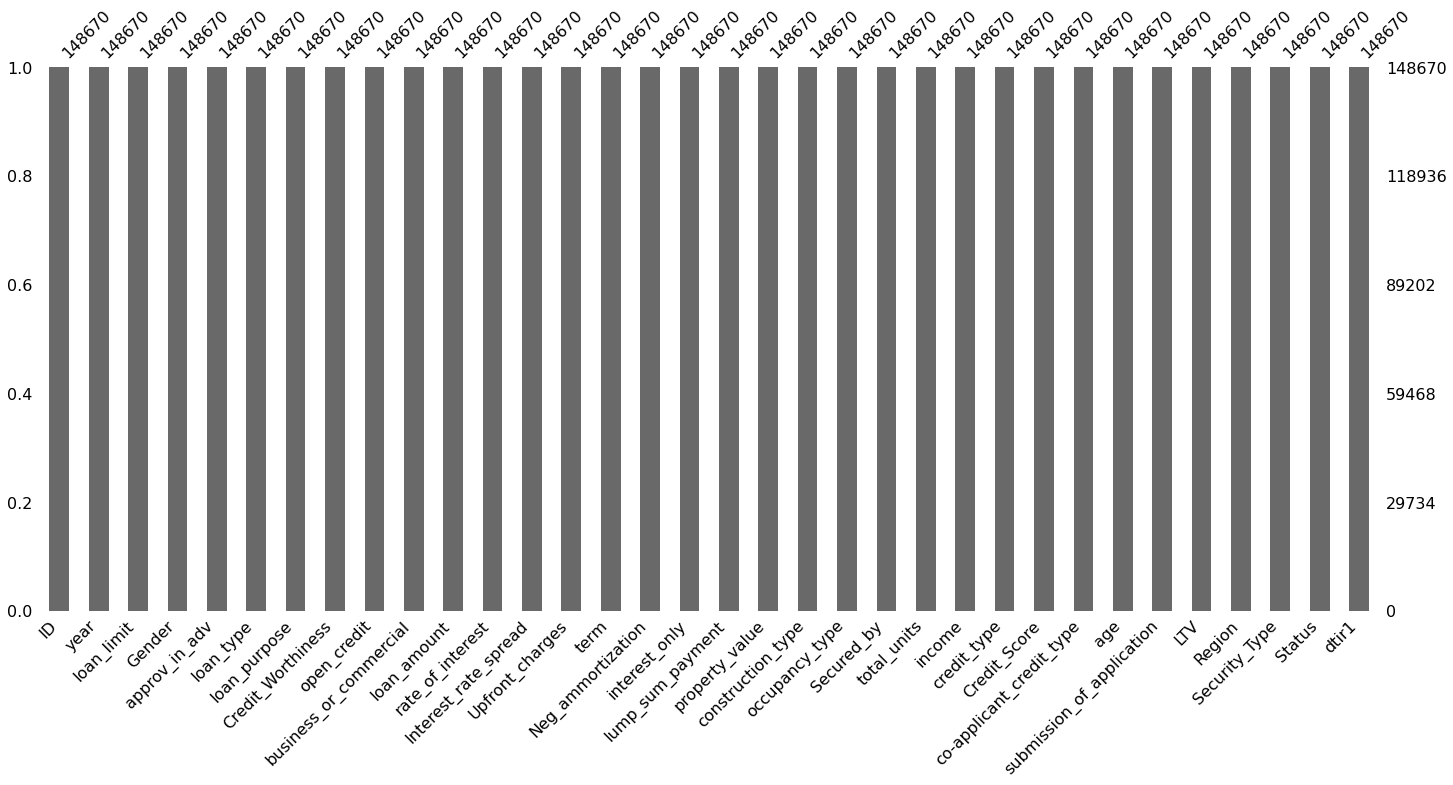

In [66]:
msno.bar(df_new)
plt.show()

We can see all missing values from the dataset are gone. Now as we temporarily encode categorical variables because we will encode them in later section so lets decode them.

In [67]:
df_new = pd.concat([df[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct,24890,2019,116500,4.11512,0.60133,3508.76000,360.00000,118000.00000,1740.00000,758,98.72881,1,45.00000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct,24891,2019,206500,3.56250,1.17457,1320.79875,360.00000,188500.00000,4980.00000,552,99.35385,1,40.15000
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct,24892,2019,406500,4.56000,0.20000,595.00000,360.00000,508000.00000,9480.00000,834,80.01969,0,46.00000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct,24893,2019,456500,4.25000,0.68100,13016.46000,360.00000,658000.00000,11880.00000,587,69.37690,0,42.00000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct,24894,2019,696500,4.00000,0.30420,0.00000,360.00000,758000.00000,10440.00000,602,91.88654,0,39.00000


In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   Neg_ammortization          148670 non-null  object 
 9   interest_only              148670 non-null  object 
 10  lump_sum_payment           148670 non-null  object 
 11  construction_type          148670 non-null  object 
 12  occupancy_type             148670 non-null  object 
 13  Secured_by                 14

<h3>(c) Linear Methods</h3>

When a complete Attribute shows a strong linear relationship with a attribute that requires imputation, a straightforward linear model may be the best approach. Linear models can be computed very quickly. Linear regression can be used for a numeric attribute that requires imputation.
Similarly, logistic regression is appropriate for a categorical attribute that requires imputation.

Let say feature rate_of_interest and Interest_rate_spread are dependent features means one feature can be defined using other. If feature rate_of_interest has missing values than it can be imputed using simple linear model trained on Interest_rate_spread.

# 2 Encoding Categorical Attributes

Categorical Features are those that contain qualitative data.This Section focuses primarily on methods that encode categorical data to numeric values.

Categorical variables/features are any feature type can be classified into three major types:

- Nominal
- Ordinal
- Binary

**Nominal variables** are variables that have two or more categories which do not have any kind of order associated with them. For Example if our dataset has any 4 types of colors, i.e. Red, Blue, Orange, Green it can be considered as a nominal variable.

**Ordinal variables** on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

**Binary Variables** are same as nominal variables but with only categories For example, if gender is classified into two groups, i.e. male and female.

For Nominal Variables We generally uses Label Encoding Scheme in which we encode each category by just converting it to some integer values this kind of encoding can work in case of Ordinal variables but **for label encoding it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them**. This ordering issue is addressed in another common alternative approach called 'One-Hot Encoding'.

One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. **The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.**

Another big issue with encoding schemes is new category or while splitting data in train/validation/test set all samples of the rare classes may split into validation/test set then during it will raise error while predicting.  


## 2.1 Supervised Encoding Methods

There are several methods of encoding categorical variable to numeric columns using the output data as a guide (so that they are supervised methods). In Supervised Techniques we will discuss following methods to encode categorical variable:-

- Effect or Likelihood Encoding  
- Target Encoding 
- Deep Learning Methods

### 2.1.1 Likelihood Encoding

The effect of the factor level on the output data is measured and this effect is used as the numeric encoding. Here effect of that particular category on output data can be calculated using simple linear models or mean, mode and median methods. 

For classification problems, a simple logistic regression model can be used to measure the effect between the categorical outcome and the categorical predictor. After Computing Effects we will compute log-odds of those effects, If the effect is p, the odds of that event are defined as p/(1 − p) and log odds by simply taking log of odds. After when we get the log odds of each category we than encode each category with them using map function.     

In [69]:
df_temp = df_new.copy()

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])


In [71]:
def likelihood_encoding(df, cat_cols, target_variable = "Status"):
    # cat_cols.remove(target_variable)
    df_temp = df.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df[col].unique():
            print(category)

            try:
                temp = df[df[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                # print(temp.drop(target_variable, axis = 1).isnull().sum())
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)
        
        for key, value in effect.items():
            effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))
            
        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp

In [72]:
df_temp = likelihood_encoding(df_temp, cat_cols)

loan_limit
1
0
2
Gender
3
2
1
0
approv_in_adv
1
2
0
loan_type
0
1
2
loan_purpose
1
4
3
2
0
Credit_Worthiness
0
1
open_credit
0
1
business_or_commercial
1
0
Neg_ammortization
2
1
0
interest_only
1
0
lump_sum_payment
1
0
construction_type
1
0
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
occupancy_type
1
2
0
Secured_by
0
1
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
total_units
0
1
2
3
credit_type
3
2
1
0
co-applicant_credit_type
0
1
age
0
3
1
2
4
6
5
7
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
submission_of_application
2
1
0
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
Region
3
0
2
1
Security_Type
1
0
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1


In [73]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,1.15428,0.91534,1.08145,1.22126,1.05238,1.13502,1.11649,1.20645,1.24380,1.12508,1.18547,1.11881,1.13653,1.11881,1.12581,1.65949,1.48734,1.25572,0.92594,1.01359,1.11881,24890,2019,116500,4.11512,0.60133,3508.76000,360.00000,118000.00000,1740.00000,758,98.72881,1,45.00000
1,1.15428,1.03665,1.08145,0.77774,1.05238,1.13502,1.11649,0.77774,1.24380,1.12508,1.23913,1.11881,1.13653,1.11881,1.12581,9.62023,0.80731,1.05202,0.92594,1.23633,1.11881,24891,2019,206500,3.56250,1.17457,1320.79875,360.00000,188500.00000,4980.00000,552,99.35385,1,40.15000
2,1.15428,1.03665,1.33317,1.22126,1.05238,1.13502,1.11649,1.20645,0.26635,1.12508,1.18547,1.11881,1.13653,1.11881,1.12581,1.65949,1.48734,1.25080,0.92594,1.01359,1.11881,24892,2019,406500,4.56000,0.20000,595.00000,360.00000,508000.00000,9480.00000,834,80.01969,0,46.00000
3,1.15428,1.03665,1.08145,1.22126,1.21024,1.13502,1.11649,1.20645,1.24380,1.12508,1.18547,1.11881,1.13653,1.11881,1.12581,1.65949,1.48734,1.15028,1.54925,1.23633,1.11881,24893,2019,456500,4.25000,0.68100,13016.46000,360.00000,658000.00000,11880.00000,587,69.37690,0,42.00000
4,1.15428,1.43934,1.33317,1.22126,1.05238,1.13502,1.11649,1.20645,1.24380,1.12508,1.18547,1.11881,1.13653,1.11881,1.12581,1.64089,0.80731,1.25572,1.54925,1.23633,1.11881,24894,2019,696500,4.00000,0.30420,0.00000,360.00000,758000.00000,10440.00000,602,91.88654,0,39.00000


In [74]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  float64
 1   Gender                     148670 non-null  float64
 2   approv_in_adv              148670 non-null  float64
 3   loan_type                  148670 non-null  float64
 4   loan_purpose               148670 non-null  float64
 5   Credit_Worthiness          148670 non-null  float64
 6   open_credit                148670 non-null  float64
 7   business_or_commercial     148670 non-null  float64
 8   Neg_ammortization          148670 non-null  float64
 9   interest_only              148670 non-null  float64
 10  lump_sum_payment           148670 non-null  float64
 11  construction_type          148637 non-null  float64
 12  occupancy_type             148670 non-null  float64
 13  Secured_by                 14

In [75]:
del df_temp

Implementation part is done While very fast, it has drawbacks. For example, what happens when a factor level has a single value? Theoretically, the log-odds should be infinite in the appropriate direction i.e. p/(1 - p) tends to infinity if p = 1. And numerically, it is usually capped at a large (and inaccurate) value.

For example in above implementation for column construction_type their are 2 categories 1 has around 148637 values and other has 33 values so for category mh which has 33 values p becomes 1 and it raises the error. Then This lead us to move to next technique known as target encoding which is simpler that likelihood encoding. 

### 2.1.2 Target Encoding

It is same as likelihood encoding but the difference is we use average of output variable for that particular category to encode values inplace of some linear model. Lets move to the implementation.

In [76]:
def target_encoding(df, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']
        
        smooth = (count * mean + weight * mean) / (weight + count)

        df.loc[:, col] = df.loc[:, col].map(smooth)

    return df

In [77]:
df_temp = df_new.copy()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])


In [79]:
df_temp = target_encoding(df_temp, cat_cols)

In [80]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,0.23971,0.28591,0.25327,0.22775,0.25877,0.24328,0.24671,0.23038,0.22380,0.24510,0.23410,0.24628,0.24304,0.24628,0.24497,0.15985,0.18433,0.22192,0.28402,0.26629,0.24628,24890,2019,116500,4.11512,0.60133,3508.76000,360.00000,118000.00000,1740.00000,758,98.72881,1,45.00000
1,0.23971,0.26191,0.25327,0.34544,0.25877,0.24328,0.24671,0.34544,0.22380,0.24510,0.77660,0.24628,0.24304,0.24628,0.24497,0.99993,0.30865,0.25887,0.28402,0.22511,0.24628,24891,2019,206500,3.56250,1.17457,1320.79875,360.00000,188500.00000,4980.00000,552,99.35385,1,40.15000
2,0.23971,0.26191,0.20894,0.22775,0.25877,0.24328,0.24671,0.23038,0.44596,0.24510,0.23410,0.24628,0.24304,0.24628,0.24497,0.15985,0.18433,0.22271,0.28402,0.26629,0.24628,24892,2019,406500,4.56000,0.20000,595.00000,360.00000,508000.00000,9480.00000,834,80.01969,0,46.00000
3,0.23971,0.26191,0.25327,0.22775,0.22975,0.24328,0.24671,0.23038,0.22380,0.24510,0.23410,0.24628,0.24304,0.24628,0.24497,0.15985,0.18433,0.24047,0.17521,0.22511,0.24628,24893,2019,456500,4.25000,0.68100,13016.46000,360.00000,658000.00000,11880.00000,587,69.37690,0,42.00000
4,0.23971,0.19162,0.20894,0.22775,0.25877,0.24328,0.24671,0.23038,0.22380,0.24510,0.23410,0.24628,0.24304,0.24628,0.24497,0.16234,0.30865,0.22192,0.17521,0.22511,0.24628,24894,2019,696500,4.00000,0.30420,0.00000,360.00000,758000.00000,10440.00000,602,91.88654,0,39.00000


- Target Encoding could be good choice for binary classification but for regression it is not, because it ignores intra-category variation of the target variable. This is addressed in Bayesian Target Encoding.

- Target encoding has a tendency to overfit due to the target leakage.

- Another problem is that some of the categories have few training examples, and the mean target value for these categories may assume extreme values, so encoding these values with mean may reduce the model performance.

These issues are addressed in Bayesian Target Encoding. Which you can read from this informational blog [Target Encoding and Bayesian Target Encoding](https://towardsdatascience.com/target-encoding-and-bayesian-target-encoding-5c6a6c58ae8c)


In [81]:
df['age'].value_counts()

45-54      34720
35-44      32818
55-64      32534
65-74      20744
25-34      19142
>74         7175
<25         1337
Missing      200
Name: age, dtype: int64

### 2.1.3 Deep Learning Methods

Another supervised approach comes from the deep learning literature on the analysis of textual data. In this case, large amounts of text can be cut up into individual words. Rather than making each of these words into its own indicator variable, word embedding or entity embedding approaches have been developed. Similar to the dimension reduction methods, the idea is to estimate a smaller set of numeric features that can be used to adequately represent the categorical predictors.

In addition to the dimension reduction, there is the possibility that these methods can estimate semantic relationships between words so that words with similar themes (e.g., “dog”, “pet”, etc.) have similar values in the new encodings. This technique is not limited to text data and can be used to encode any type of qualitative variable.

The idea is well very simple do not extract features manually use neural network to do the hard part and just wait for the results.

## 2.2 Approaches for Novel Categories

What if some new category introduce to some attribute in future how will we encode that variable then? If there is a possibility of encountering a new category in the future, one strategy would be to use the "other" category to capture new values. 

While this approach may not be the most effective at extracting predictive information relative to the response for this specific category, it does enable the original model to be applied to new data without completely refitting and we do need to ensure that the "other" category is present in the training/testing data.

After assigning "other" category to novel category than we can do all kinds of encodings we studied above